<a href="https://colab.research.google.com/github/amazon4b/Learning-Machine/blob/learner1/%EA%B2%BD%EA%B8%B0%EB%B6%84%EC%84%9D%EC%A0%84_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81%EA%B3%BC_%ED%94%BC%EC%B3%90%EC%85%80%EB%A0%89%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 스케일링

In [2]:
import warnings

# 경고 메시지를 출력하지 않도록 설정
warnings.filterwarnings("ignore")

# 경고 메시지를 발생시키는 함수
def example_function():
    warnings.warn("이 함수는 예제일 뿐입니다.", UserWarning)

# 함수 호출
example_function()

In [3]:
# 기본패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans # 케이민즈 알고리즘
from sklearn.preprocessing import StandardScaler# 스텐다드 스케일러
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc

In [4]:
# 데이터프레임 불러오기
economics = pd.read_csv('./datasets/resampled_data_final.csv',encoding="euc-kr")
economics['DATE'] = pd.to_datetime(economics['DATE'])
economics['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 289 entries, 0 to 288
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
287 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


In [5]:
economics.head()

,DATE,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,M2통화량,신규실업수당청구,경기동행종합,산업생산지수,소매판매
0,2000-01-31,0.92,0.07,27.259,4.0,1636.0,100.000,-0.193,0.579,112.0,5.45,337504.0,4666.2,288400.0,86.22,91.4251,268044.0
1,2000-02-29,0.64,-0.11,29.366,4.1,1737.0,100.571,-0.204,0.595,111.3,5.73,337504.0,4679.4,293750.0,86.42,91.7357,272020.0
2,2000-03-31,0.15,-0.47,29.842,4.0,1604.0,101.466,-0.130,0.608,107.1,5.85,370003.0,4710.2,274750.0,86.85,92.0933,275192.0
3,2000-04-30,0.41,-0.45,25.722,3.8,1626.0,102.540,-0.044,0.618,109.2,6.02,336901.0,4766.1,271600.0,87.19,92.6838,271046.0
4,2000-05-31,0.66,-0.40,28.788,4.0,1575.0,103.702,0.021,0.632,110.7,6.27,344615.0,4753.9,282250.0,87.38,92.9376,271394.0


In [7]:
economics.drop(['장단기10년물국채/3개월금리차','신규실업수당청구','금융상태지수레버리지','제조업신규주문'],axis=1,inplace=True)

In [8]:
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매
287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
economics = economics.iloc[:287 , ] # 결측치 제거
economics[economics.isna().any(axis=1)] # 결측치 확인

,DATE,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,M2통화량,경기동행종합,산업생산지수,소매판매


In [10]:
# 2000~ 2023년까지 군집화 돌렸지만 코로나 영향으로 코로나 이전과 이후 시기로 2개의 군집으로 형성 되어
# 시기 조정하여 데이터 전처리 실행

In [11]:
# 2000년~2019년만 군집화하기 위함 , 코로나 데이터가 이상치로 잡히기 때문에 군집이 제대로 형성되지 않음
economics = economics.loc[economics['DATE'].dt.year <=2019 ]

In [12]:
# 주택가격지수. 제조업신규주문 , 경기동행종합지수는 차분하고 (변동치로 변경한다는 뜻)
# 제조업 신규주문은 앞으로 어떻게 처리할지 일단 보류
#M2와 소매판매는 변화율로 바꾸는 전처리 시행
economics.주택가격지수 = economics.주택가격지수.diff().fillna(method= 'bfill')
economics.경기동행종합 = economics.경기동행종합.diff().fillna(method= 'bfill')
economics['M2차분'] = economics.M2통화량.diff().fillna(method= 'bfill')
economics['M2변화율'] = economics.M2차분/ (economics.M2통화량.shift(1)) * 100
#economics['M2변화율'] .fillna(method = 'ffill')
economics['소매판매차분'] = economics.소매판매.diff().fillna(method='bfill')
economics['소매판매변화율'] = economics.소매판매차분/ (economics.소매판매.shift(1)) * 100


# 차분, 변화율 확인
economics[['M2통화량','M2차분','M2변화율','소매판매','소매판매차분','소매판매변화율']].head(10)
# 결측치를 다음날 데이터로 채워주기
economics['M2변화율'] = economics['M2변화율'].fillna(method = 'bfill')
economics['소매판매변화율'] = economics['소매판매변화율'].fillna(method = 'bfill')
# M2, 소매판매 원데이터를 지웠습니다.
economics.drop(['M2통화량','M2차분','소매판매','소매판매차분'],axis = 1,inplace = True)

In [13]:
economics = economics.set_index('DATE')

In [14]:
economics.head()

,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,소비자감성지수,기준금리,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,
2000-01-31,0.07,27.259,4.0,1636.0,0.571,-0.193,112.0,5.45,0.20,91.4251,0.282885,1.483339
2000-02-29,-0.11,29.366,4.1,1737.0,0.571,-0.204,111.3,5.73,0.20,91.7357,0.282885,1.483339
2000-03-31,-0.47,29.842,4.0,1604.0,0.895,-0.130,107.1,5.85,0.43,92.0933,0.658204,1.166091
2000-04-30,-0.45,25.722,3.8,1626.0,1.074,-0.044,109.2,6.02,0.34,92.6838,1.186786,-1.506584
2000-05-31,-0.40,28.788,4.0,1575.0,1.162,0.021,110.7,6.27,0.19,92.9376,-0.255974,0.128391


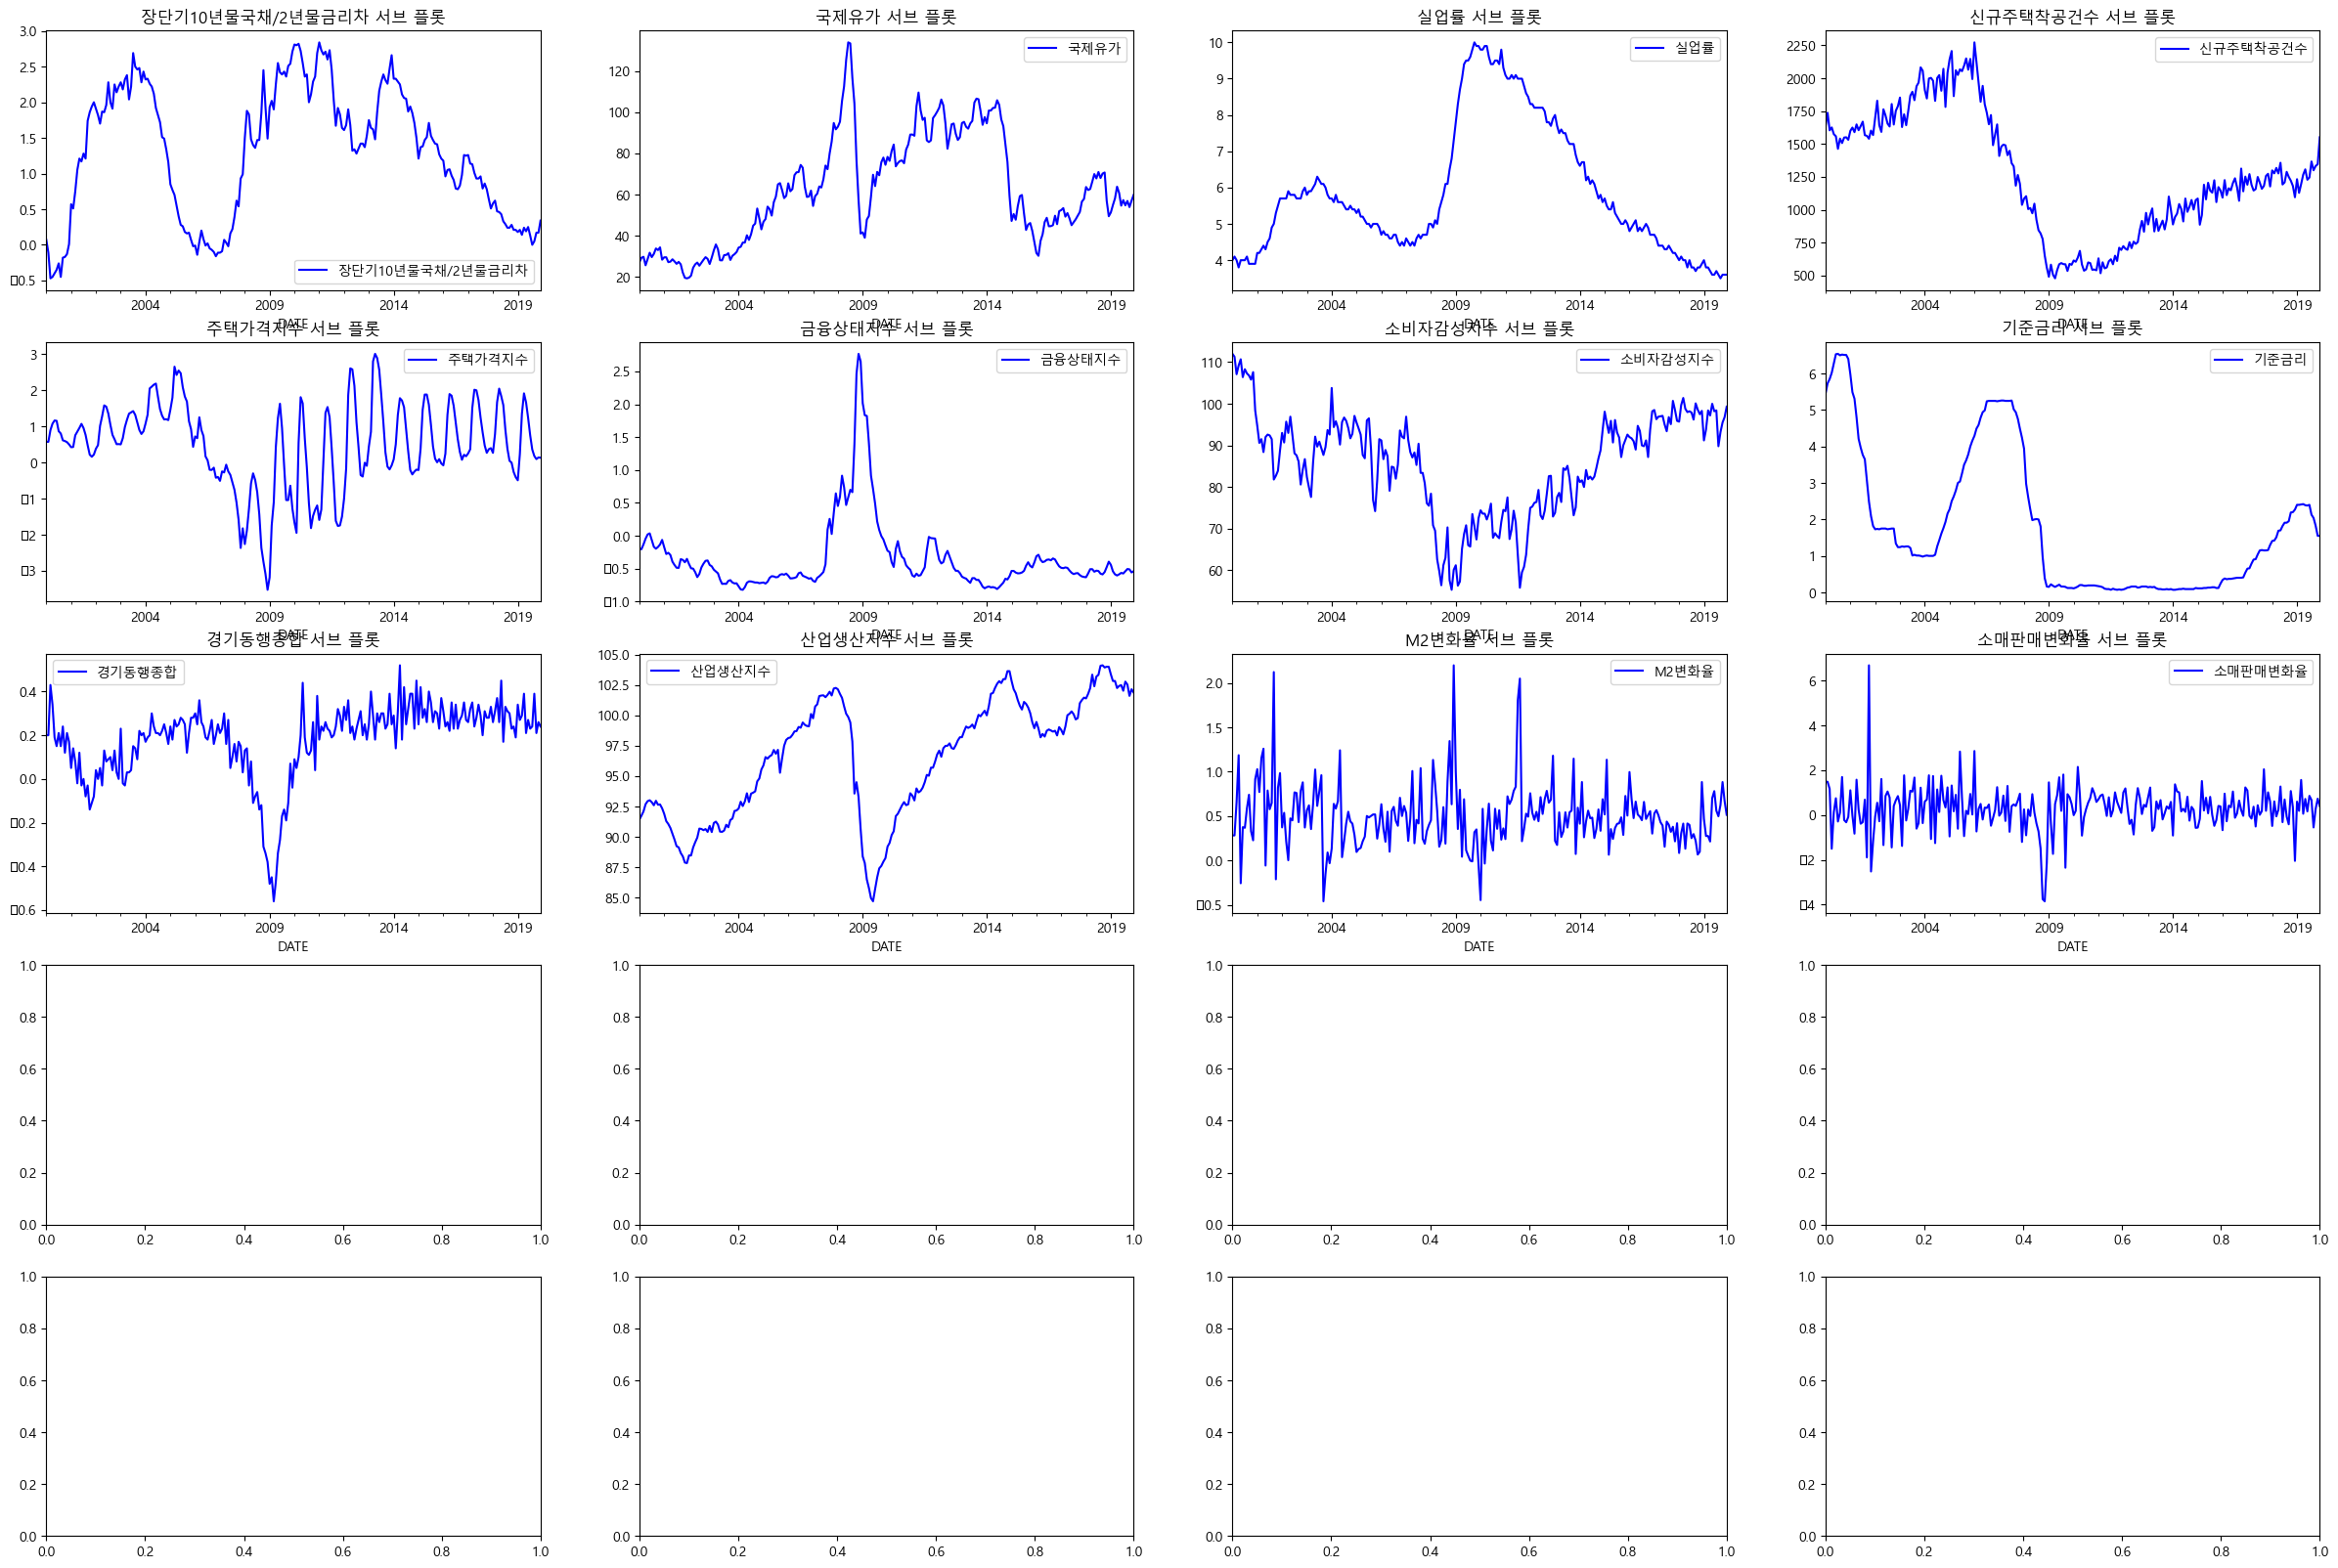

In [15]:
# 그래프 크기 조정
plt.rcParams['font.family'] ='Malgun Gothic'
가로, 세로 = 30, 20  # 원하는 크기로 조절
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(가로, 세로))  # 3행 4열의 서브 플롯 생성
# 각 컬럼에 대한 서브 플롯 그리기
for i, col in enumerate(economics.columns):
    economics.plot(y= col, kind='line', ax=axs[i//4, i%4], color='blue')
    axs[i//4, i%4].set_title(f'{col} 서브 플롯')

# 그래프 출력
plt.show()

In [ ]:
# # scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
# from sklearn.preprocessing import StandardScaler
# # StandardScaler 객체를 생성합니다.
# standard_scaler = StandardScaler()
# # fit_transform()을 사용해서 학습과 스케일링을 한 번에 적용합니다.
# scaled_eocs = standard_scaler.fit_transform(economics)
# # 표준화가 완료된 데이터를 데이터프레임 형태로 변환합니다.
# scaled_eocs = pd.DataFrame(scaled_eocs,
#                               index=economics.index,
#                               columns=economics.columns)
# # 표준화가 잘 되었는지 데이터를 확인해봅시다.
# scaled_eocs.head()

,장단기10년물국채/3개월금리차,장단기10년물국채/2년물금리차,국제유가,실업률,신규주택착공건수,주택가격지수,금융상태지수,금융상태지수레버리지,소비자감성지수,기준금리,제조업신규주문,신규실업수당청구,경기동행종합,산업생산지수,M2변화율,소매판매변화율
DATE,,,,,,,,,,,,,,,,
2000-01-31,-0.703269,-1.358922,-1.322363,-1.041818,0.794549,0.084752,0.270843,0.389117,2.143427,1.916132,-1.291321,-0.650815,0.123418,-1.022683,-0.603253,1.181786
2000-02-29,-0.942971,-1.556543,-1.241600,-0.986439,1.011004,0.084752,0.251169,0.401823,2.086199,2.062488,-1.291321,-0.590551,0.123418,-0.959506,-0.603253,1.181786
2000-03-31,-1.362450,-1.951786,-1.223355,-1.041818,0.725970,0.356788,0.383517,0.412146,1.742831,2.125212,-0.777792,-0.804573,1.456621,-0.886769,0.447297,0.867074
2000-04-30,-1.139870,-1.929828,-1.381277,-1.152576,0.773118,0.507079,0.537326,0.420087,1.914515,2.214071,-1.300849,-0.840055,0.934933,-0.766660,1.926844,-1.784234
2000-05-31,-0.925850,-1.874933,-1.263755,-1.041818,0.663820,0.580965,0.653577,0.431204,2.037146,2.344746,-1.178957,-0.720091,0.065453,-0.715037,-2.111568,-0.162329


In [16]:
# MinMaxScale

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(economics)

# 데이터 변환
mMscaled_data = mMscaler.transform(economics)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(economics)

In [17]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters =4, init = 'k-means++', max_iter= 300, random_state= 0) # 군집을 4개로
# kmeans.fit(mMscaled_data)

#### Kmeans

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


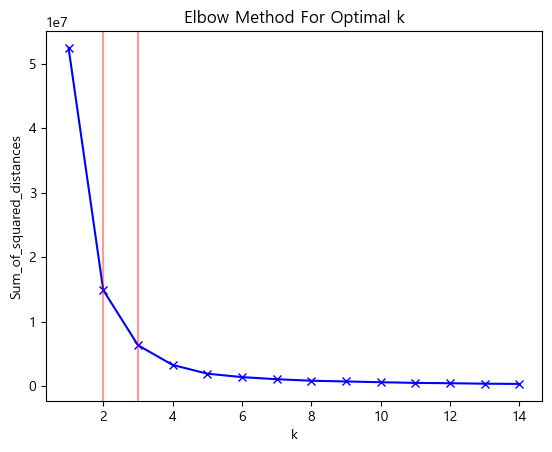

In [19]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(mMscaled_data) # 데이터프레임 입력
    sum_of_squared_distances.append(km.inertia_)

# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(mMscaled_data)#데이터프레임
  clusters = kmeans.predict(mMscaled_data)#데이터프레임입력

  score = silhouette_score(mMscaled_data, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.45935225369575305
k : 3 score : 0.44681760962304373
k : 4 score : 0.4453323249085537
k : 5 score : 0.4524072826582406
k : 6 score : 0.4656555165233536
k : 7 score : 0.4338811018282834
k : 8 score : 0.42359159464762525
k : 9 score : 0.4110247357853603
k : 10 score : 0.42066941967598925
k : 11 score : 0.4097707365997449
k : 12 score : 0.41222239279508427
k : 13 score : 0.4104828425478466
best n : 6 best score : 0.4656555165233536


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

# KMeans
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=300, random_state=200)
kmeans.fit(mMscaled_data)

# 데이터 프레임에 cluster 추가
mMscaled_data["cluster"] = kmeans.labels_

# 개별 데이터 실루엣 계수
score_samples = silhouette_samples(mMscaled_data, mMscaled_data.cluster)
print(f'silhouette_samples( ) return 값의 shape: {score_samples.shape}')

# 데이터 프레임에 실루엣 계수 추가
mMscaled_data['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(mMscaled_data, mMscaled_data.cluster)
print(f'경제데이터 Silhouette Analysis Score: {average_score:.3f}')


silhouette_samples( ) return 값의 shape: (240,)
경제데이터 Silhouette Analysis Score: 0.596


In [21]:
mMscaled_data.groupby("cluster").mean()[["silhouette_coeff"]]

,silhouette_coeff
cluster,
0,0.50
1,0.55
2,0.71
3,0.58
4,0.60
5,0.60


In [22]:
# 군집 내 피쳐들간의 상관관계로 실루엣 계수가 높을수록 좋음

In [23]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

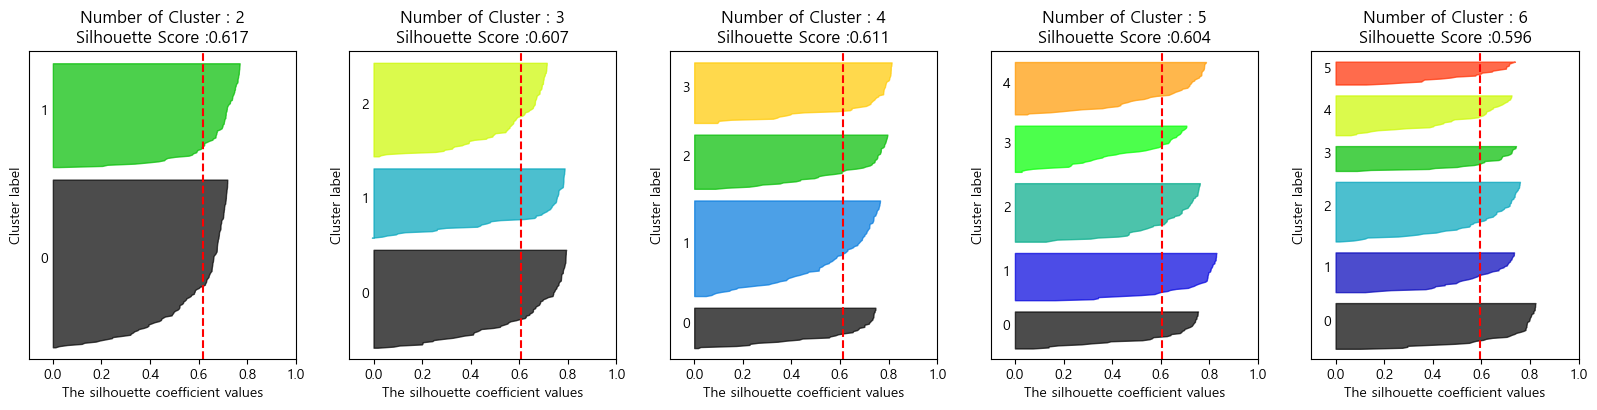

In [24]:
# 군집 개수 최적화
visualize_silhouette([ 2, 3, 4, 5 , 6], mMscaled_data)

In [ ]:
# 0번 군집의 시기를 확인해봅니다.
mMscaled_data[mMscaled_data['cluster']== 4]

In [26]:
# 각 군집마다 해당되는 월의 개수를 표시해줍니다.
data_list = list(mMscaled_data['cluster'].value_counts())
for i, j  in enumerate(data_list) :
    print(f'{i}번째 클러스터 개수는 {j}개 입니다')

0번째 클러스터 개수는 60개 입니다
1번째 클러스터 개수는 47개 입니다
2번째 클러스터 개수는 42개 입니다
3번째 클러스터 개수는 41개 입니다
4번째 클러스터 개수는 26개 입니다
5번째 클러스터 개수는 24개 입니다


### ANOVA

In [27]:
cluster0 = mMscaled_data[mMscaled_data['cluster']==0]
cluster1 = mMscaled_data[mMscaled_data['cluster']==1]
cluster2 = mMscaled_data[mMscaled_data['cluster']==2]
cluster3 = mMscaled_data[mMscaled_data['cluster']==3]
cluster4 = mMscaled_data[mMscaled_data['cluster']==4]
cluster5 = mMscaled_data[mMscaled_data['cluster']==5]

In [28]:
mMscaled_data.drop(['silhouette_coeff'],axis=1,inplace=True)

In [29]:
mMscaled_data.columns

Index(['장단기10년물국채/2년물금리차', '국제유가', '실업률', '신규주택착공건수', '주택가격지수', '금융상태지수',
       '소비자감성지수', '기준금리', '경기동행종합', '산업생산지수', 'M2변화율', '소매판매변화율', 'cluster'],
      dtype='object')

In [30]:
mMscaled_data['cluster'].unique()

array([3, 1, 5, 4, 0, 2])

In [31]:
# 각 피쳐들이 서로 독립적이라고 가정하고 One-way ANOVA 수행
# 따라서 독립성 검정 통해 상관성 높은 피쳐 제거

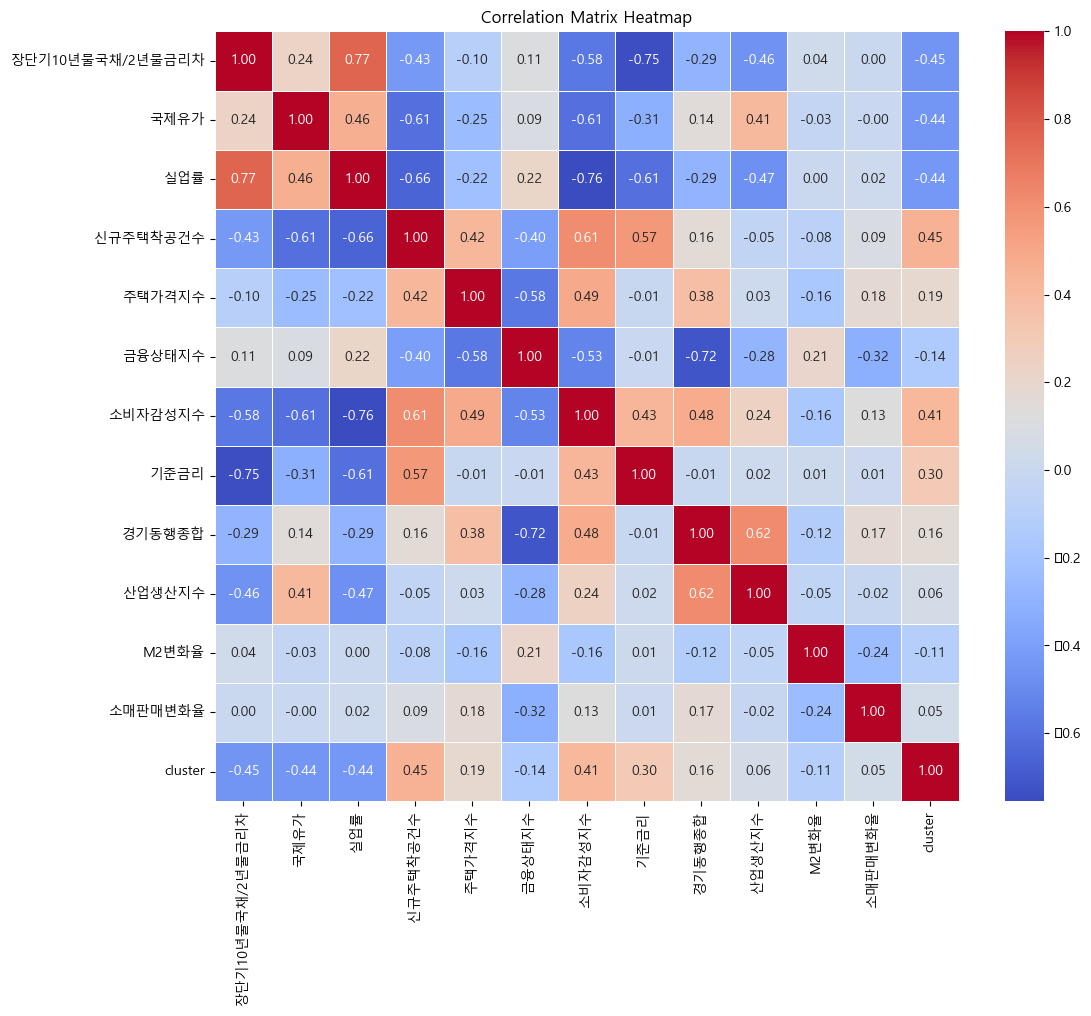

In [32]:
# 독립성 검정
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 행렬 계산
correlation_matrix = mMscaled_data[mMscaled_data.columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [34]:
mMscaled_data.columns

Index(['장단기10년물국채/2년물금리차', '국제유가', '실업률', '신규주택착공건수', '주택가격지수', '금융상태지수',
       '소비자감성지수', '기준금리', '경기동행종합', '산업생산지수', 'M2변화율', '소매판매변화율', 'cluster'],
      dtype='object')

#### 정규성 검정

In [36]:
# 정규성 검정 (Shapiro-Wilk)
# 귀무가설 : 정규분포를 따른다
from scipy.stats import shapiro

# 클러스터별 feature에 대해 정규성 검정 수행
for cluster_num in range(6):  # 클러스터 번호는 0부터 5까지 총 6개
    cluster_data = mMscaled_data[mMscaled_data['cluster'] == cluster_num]
    
    print(f"\nCluster {cluster_num} - Shapiro-Wilk Test:")
    for column in cluster_data.columns:
        shapiro_test = shapiro(cluster_data[column])
        if shapiro_test.pvalue >= 0.05:
            print(f"{column} - p-value: {shapiro_test.pvalue}")


Cluster 0 - Shapiro-Wilk Test:
장단기10년물국채/2년물금리차 - p-value: 0.10671351104974747
주택가격지수 - p-value: 0.20692913234233856
소비자감성지수 - p-value: 0.10244425386190414
산업생산지수 - p-value: 0.05629901960492134
소매판매변화율 - p-value: 0.8861888647079468
cluster - p-value: 1.0

Cluster 1 - Shapiro-Wilk Test:
신규주택착공건수 - p-value: 0.40387025475502014
주택가격지수 - p-value: 0.5409349203109741
금융상태지수 - p-value: 0.15425415337085724
소비자감성지수 - p-value: 0.1092437282204628
경기동행종합 - p-value: 0.052424896508455276
M2변화율 - p-value: 0.5664107799530029
소매판매변화율 - p-value: 0.05580735579133034
cluster - p-value: 1.0

Cluster 2 - Shapiro-Wilk Test:
주택가격지수 - p-value: 0.13224373757839203
cluster - p-value: 1.0

Cluster 3 - Shapiro-Wilk Test:
경기동행종합 - p-value: 0.6958402991294861
M2변화율 - p-value: 0.050446074455976486
cluster - p-value: 1.0

Cluster 4 - Shapiro-Wilk Test:
신규주택착공건수 - p-value: 0.2753461003303528
경기동행종합 - p-value: 0.8503426909446716
소매판매변화율 - p-value: 0.09669703990221024
cluster - p-value: 1.0

Cluster 5 - Shapiro-Wilk Tes

#### 등분산성 검정

In [106]:
# 등분산성 검정 - 레빈검정
# 귀무가설 : 등분산성의 특징이 있다
from scipy.stats import bartlett

# 등분산성 검정을 수행할 데이터프레임들
dataframes = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5]

# 각 데이터프레임에 대해 등분산성 검정 수행
for i, cluster_data in enumerate(dataframes):
    print(f"\nCluster {i} - Bartlett's Test:")
    for column in cluster_data.columns:
        # 등분산성 검정 수행
        bartlett_test = bartlett(*[dataframe[column] for dataframe in dataframes])
        if bartlett_test.pvalue >= 0.05:
            print(f"{column} - p-value: {bartlett_test.pvalue}")


Cluster 0 - Bartlett's Test:

Cluster 1 - Bartlett's Test:

Cluster 2 - Bartlett's Test:

Cluster 3 - Bartlett's Test:

Cluster 4 - Bartlett's Test:

Cluster 5 - Bartlett's Test:


In [ ]:
# 등분산성 검정 결과 등분산성 가정 만족하는 피쳐 없음

#### ANOVA 수행

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.formula.api import ols

for col in cluster0.columns:
    F, p = stats.f_oneway(cluster0[col],
                    cluster1[col],
                    cluster2[col],
                    cluster3[col],
                    cluster4[col],
                    cluster5[col])
    # print(col)
    # print( 'F-Ratio: {}'.format(F)
    # , 'p-value:{}'.format(p)
    #  , sep = '\n')
    if p <= 0.05:
        print(f"{col} \n F-Ratio: {F} \n p-value: {p}")

장단기10년물국채/3개월금리차 
 F-Ratio: 29.53516788972523 
 p-value: 3.278550383727554e-23
장단기10년물국채/2년물금리차 
 F-Ratio: 43.143587495061766 
 p-value: 2.0759044212551937e-31
국제유가 
 F-Ratio: 159.39822040337015 
 p-value: 2.93029144592748e-73
실업률 
 F-Ratio: 105.86690727058684 
 p-value: 4.678803972883286e-58
신규주택착공건수 
 F-Ratio: 120.64311958081497 
 p-value: 1.0010268109053337e-62
주택가격지수 
 F-Ratio: 16.082993509410116 
 p-value: 1.2695650626028066e-13
금융상태지수 
 F-Ratio: 27.760878073958168 
 p-value: 4.855067306753811e-22
금융상태지수레버리지 
 F-Ratio: 15.199590486453351 
 p-value: 6.250051094448597e-13
소비자감성지수 
 F-Ratio: 127.11892072734729 
 p-value: 1.2066311283793332e-64
기준금리 
 F-Ratio: 22.24369804597585 
 p-value: 3.1659277219513073e-18
제조업신규주문 
 F-Ratio: 241.5442190634614 
 p-value: 3.022797849016049e-90
신규실업수당청구 
 F-Ratio: 408.9237192906284 
 p-value: 1.8462032254577544e-113
경기동행종합 
 F-Ratio: 70.29769200810442 
 p-value: 1.1361399520490755e-44
산업생산지수 
 F-Ratio: 215.0221049492544 
 p-value: 2.3469608764769703

In [ ]:
# ANOVA 수행 결과, p-value값이 0.05 미만이면 통계적으로 유의